In [34]:
import missing_values_module as mvm
import pandas as pd
import numpy as np

from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import PRatioEncoder
from feature_engine.encoding import DecisionTreeEncoder
from feature_engine.encoding import RareLabelEncoder


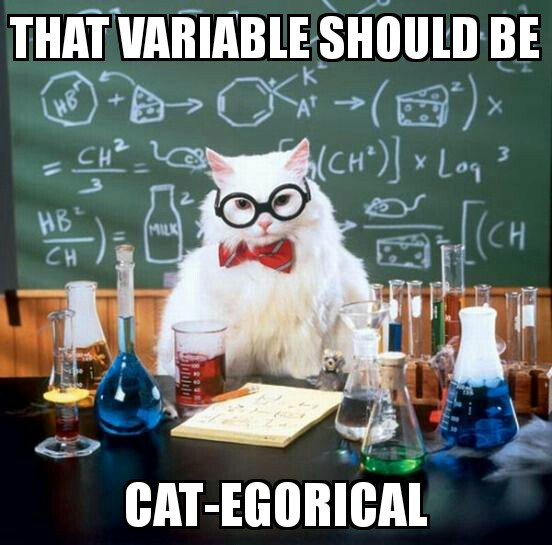

# Some encoders for categorical variables

## Separate methods

### [Mean-value encoder](https://feature-engine.readthedocs.io/en/latest/encoding/MeanEncoder.html)

Метод из feature_engine. Метод заполнит качественные переменные средним значением зависимой переменной по категориям. Авторы отмечают, что метод может генерировать NaN, когда в тестовую выборку попадает категория, которой не было в обучающей.

1. Методу не нравятся NaN

In [9]:
test_df = mvm.create_test_df()
MVE = MeanEncoder(variables = ["xcat"])
MVE.fit(test_df, test_df["target"])
MVE.transform(test_df, test_df["target"])


ValueError: Some of the variables to transform contain NaN. Check and remove those before using this transformer.

In [25]:
test_df = mvm.create_test_df(nans = False)
MVE = MeanEncoder(variables = ["xcat"])
MVE.fit(test_df.drop("target", axis = 1), test_df["target"])
print(MVE.encoder_dict_)
MVE.transform(test_df.drop("target", axis = 1))

{'xcat': {'a': 0.5007688364941056, 'b': 0.4955209806694955, 'c': 0.4862944162436548, 'd': 0.49063291139240506, 'e': 0.48663640948058495}}


,x1,x2,x3,x4,xcat
0,1.453047,0.670501,1.412369,-0.436977,0.486294
1,-0.198040,0.077424,1.831615,-0.186359,0.490633
2,2.065970,-0.396919,0.220531,0.885373,0.486636
3,0.976408,-0.141468,-0.880732,0.501881,0.490633
4,-0.403070,0.131706,-0.861659,-0.08681,0.495521
...,...,...,...,...,...
9995,-1.046530,0.411072,-0.749273,-0.067379,0.495521
9996,0.070867,0.063558,-0.304721,0.015728,0.490633
9997,-0.581372,-0.772863,-0.755230,-1.268474,0.495521
9998,-1.123265,0.303150,0.104258,0.470407,0.500769


### [Probability ratio encoder](https://feature-engine.readthedocs.io/en/latest/encoding/PRatioEncoder.html)

Метод из feature_engine. Работает только для бинарного выбора. Метод заполнит качественные переменные отношением доли единиц в зависимой переменной к доле нулей. Скажем, если вероятность единицы = 0.8 для категории, а нуля = 0.2, то для этой категории подставится значение 0.8/0.2 (если method = ratio) и log(0.8/0.2) (если log_ratio). Кодировать можно не только категориальные переменные, но и числовые, но не уверен, что это очень осмысленно. Авторы отмечают, что метод может генерировать NaN, когда в тестовую выборку попадает категория, которой не было в обучающей.

1. Методу не нравятся NaN

In [20]:
test_df = mvm.create_test_df()
MVE = PRatioEncoder(variables = ["xcat"])
MVE.fit(test_df, test_df["target"])
MVE.transform(test_df, test_df["target"])


ValueError: Some of the variables to transform contain NaN. Check and remove those before using this transformer.

2. Если кодировать только категориальную переменную

In [26]:
test_df = mvm.create_test_df(nans = False)
MVE = MeanEncoder(variables = ["xcat"])
MVE.fit(test_df.drop("target", axis = 1), test_df["target"])
print(MVE.encoder_dict_)
MVE.transform(test_df.drop("target", axis = 1))

{'xcat': {'a': 0.49686444766039556, 'b': 0.49749498997995995, 'c': 0.5054563492063492, 'd': 0.5136842105263157, 'e': 0.49280397022332506}}


,x1,x2,x3,x4,xcat
0,1.559400,0.184800,0.293250,0.118548,0.497495
1,0.519561,1.082209,0.349114,-0.906997,0.492804
2,2.187208,-0.807944,-0.728788,0.317847,0.513684
3,1.607322,-2.713915,-4.070574,0.597688,0.497495
4,0.541801,0.322216,0.935503,1.390378,0.496864
...,...,...,...,...,...
9995,1.968114,0.295187,1.192285,-0.068678,0.513684
9996,0.242668,-0.131095,0.550497,-0.600836,0.505456
9997,-0.619093,-1.379274,-1.497952,0.494807,0.492804
9998,-1.630229,0.195281,-0.599442,-0.570678,0.497495


3. Если кодировать все переменные получается странно


In [22]:
test_df = mvm.create_test_df(nans = False)
MVE = MeanEncoder(ignore_format = True)
MVE.fit(test_df.drop("target", axis = 1), test_df["target"])
MVE.transform(test_df.drop("target", axis = 1))

,x1,x2,x3,x4,xcat
0,0,0,0,0,0.522141
1,1,1,1,1,0.490235
2,0,0,0,0,0.522141
3,1,1,1,1,0.522141
4,0,0,0,0,0.490235
...,...,...,...,...,...
9995,1,1,1,1,0.514655
9996,0,0,0,0,0.522141
9997,1,1,1,1,0.514655
9998,0,0,0,0,0.522141


### [DecisionTreeEncoder](https://feature-engine.readthedocs.io/en/latest/encoding/DecisionTreeEncoder.html)

Метод из feature_engine. Строит Decision Tree для каждой кодируемой фичи (таргет на эту одну фичу), заполняет категории прогнозом дерева. 

1. Методу не нравятся NaN

In [28]:
test_df = mvm.create_test_df()
MVE = DecisionTreeEncoder(variables = ["xcat"])
MVE.fit(test_df, test_df["target"])
MVE.transform(test_df, test_df["target"])


ValueError: Some of the variables to transform contain NaN. Check and remove those before using this transformer.

2. Если кодировать только категориальную переменную

In [30]:
test_df = mvm.create_test_df(nans = False)
MVE = DecisionTreeEncoder(variables = ["xcat"])
MVE.fit(test_df.drop("target", axis = 1), test_df["target"])
MVE.transform(test_df.drop("target", axis = 1))

,x1,x2,x3,x4,xcat
0,1.344393,-0.327361,1.888783,0.62292,0.504945
1,0.793366,-1.318562,-0.445168,-0.342996,0.504945
2,0.382489,-0.069929,-0.984001,0.480791,0.504945
3,0.161386,-0.100647,-0.750603,-0.733446,0.504945
4,1.304786,0.313643,1.095614,0.40845,0.498101
...,...,...,...,...,...
9995,0.011731,-0.013646,-0.513358,0.142262,0.504945
9996,-0.071172,0.045359,1.832455,-1.48483,0.498101
9997,-0.694754,0.306068,1.142642,-0.817569,0.498101
9998,-0.580552,0.783255,0.419147,-1.234731,0.498101


3. Если кодировать все переменные получается странно, но не так как в PRatio

In [31]:
test_df = mvm.create_test_df(nans = False)
MVE = DecisionTreeEncoder(ignore_format = True)
MVE.fit(test_df.drop("target", axis = 1), test_df["target"])
MVE.transform(test_df.drop("target", axis = 1))

,x1,x2,x3,x4,xcat
0,0.46365,0.46365,0.46365,0.46365,0.505888
1,0.46365,0.46365,0.46365,0.46365,0.496781
2,0.46365,0.46365,0.46365,0.46365,0.505888
3,0.46365,0.46365,0.46365,0.46365,0.505888
4,0.46365,0.46365,0.46365,0.46365,0.513568
...,...,...,...,...,...
9995,0.50778,0.50778,0.50778,0.50778,0.496781
9996,0.50778,0.50778,0.50778,0.50778,0.496719
9997,0.50778,0.50778,0.50778,0.50778,0.483228
9998,0.50778,0.50778,0.50778,0.50778,0.513568


4. В отличие от предыдущих, у этого метода есть гиперпараметры

In [32]:
test_df = mvm.create_test_df(nans = False)
MVE = DecisionTreeEncoder(encoding_method='ordered', #arbitrary - числовые значения присваиваются категориям случайно,  ordered - по убыванию вероятности таргета
                          cv=3, #кросс-валидация
    scoring='neg_mean_squared_error', #метрика для оптимизации дерева из sklearn.metrics
    param_grid=None, #словарь со всеми гиперпараметрами DecisionTreeRegressor() 
    regression=False) #regression/classification

MVE.fit(test_df.drop("target", axis = 1), test_df["target"])
MVE.transform(test_df.drop("target", axis = 1))

,x1,x2,x3,x4,xcat
0,-0.403144,0.420791,-0.922170,0.0,0.500748
1,-0.136248,-0.012753,-0.120888,1.0,0.512756
2,0.079119,-0.054869,-0.084922,0.0,0.500748
3,-1.106450,1.587004,2.551209,0.0,0.483434
4,-0.539117,-0.136203,0.206670,0.0,0.500748
...,...,...,...,...,...
9995,-0.857993,-0.340869,-1.973617,1.0,0.500748
9996,-0.528590,-0.177513,-1.463290,0.0,0.474525
9997,0.224947,-0.326203,-0.726217,1.0,0.483434
9998,-0.456117,0.456731,-0.360367,0.0,0.483434


### [RareLabelEncoder](https://feature-engine.readthedocs.io/en/latest/encoding/RareLabelEncoder.html)

Метод из feature_engine. Он нужен в дополнение к прочим методам кодирования переменных, так как предназначен для замены редких категорий: все категории, которые встречаются реже опреленной частоты, объединяются под новым лейблом Rare. 

1. Методу не нравятся NaN

In [35]:
test_df = mvm.create_test_df()
MVE = RareLabelEncoder(variables = ["xcat"], n_categories = 1)
MVE.fit(test_df, test_df["target"])
MVE.transform(test_df, test_df["target"])


ValueError: Some of the variables to transform contain NaN. Check and remove those before using this transformer.

2. Если кодировать только категориальную переменную (проверяем, что метод вообще не выдает ошибку - в нашем датасете  пока нет редких категорий). 

In [49]:
test_df = mvm.create_test_df(nans = False)
MVE = RareLabelEncoder(variables = ["xcat"], n_categories = 1)
MVE.fit(test_df.drop("target", axis = 1), test_df["target"])
MVE.transform(test_df.drop("target", axis = 1))

,x1,x2,x3,x4,xcat
0,0.606286,-0.272584,0.439589,0.127674,b
1,0.238903,-0.063063,-1.202516,1.04028,b
2,-0.067544,-0.065340,1.578673,-0.436767,b
3,-0.892222,-1.280809,-0.391598,-1.377757,a
4,-0.428466,-0.120956,2.857575,0.481951,b
...,...,...,...,...,...
9995,-0.296488,0.421506,1.924557,0.983132,e
9996,1.272406,-1.598264,-0.603138,-0.366808,a
9997,-0.721664,-0.419499,0.839654,-1.880931,e
9998,-1.693404,0.418324,1.112862,-0.112343,b


3. Добавим редкие категории

In [50]:
test_df = mvm.create_test_df(nans = False)
test_df.loc[:1, "xcat"] = "Sobaka"
test_df.loc[2:3, "xcat"] = "Koshka"
test_df.loc[4:5, "xcat"] = "Vykhukhol'"
MVE = RareLabelEncoder(variables = "xcat", n_categories = 1)
MVE.fit(test_df.drop("target", axis = 1), test_df["target"])
MVE.transform(test_df.drop("target", axis = 1))

,x1,x2,x3,x4,xcat
0,0.851954,-0.383434,-0.500605,0.357751,Rare
1,-0.947798,-1.180205,-0.636963,-0.077106,Rare
2,-0.617993,-0.124152,1.002461,1.399367,Rare
3,0.187182,-0.186648,-1.083712,0.878411,Rare
4,-2.019743,-1.858913,-1.204854,-0.038098,Rare
...,...,...,...,...,...
9995,-2.533250,-0.424591,-1.394903,-1.503673,e
9996,-0.127937,-0.042329,1.710767,-1.676709,d
9997,-1.158315,0.987640,0.628728,-0.952993,c
9998,0.453345,-0.282137,-2.038745,0.942533,a


4. Параметры у метода есть, но они странные, кроме tol

А еще он по умолчанию опознает как категориальную переменную что-то лишнее

In [59]:
test_df = mvm.create_test_df(nans = False)
test_df.loc[:1, "xcat"] = "Sobaka"
test_df.loc[2:3, "xcat"] = "Koshka"
test_df.loc[4:5, "xcat"] = "Vykhukhol'"
MVE = RareLabelEncoder(tol=0.05, #пороговая частота категории,за которой она уже не считается редкой
                          n_categories=1, #минимальное количество категорий, которые должны быть в фиче, чтобы к ней применялась замена (??, по дефолту 10, я бы убрал вообще)
    max_n_categories=100, #аналогично, но верхнее значение. None по дефолту
                         ) 

MVE.fit(test_df.drop("target", axis = 1), test_df["target"])
MVE.transform(test_df.drop("target", axis = 1))

,x1,x2,x3,x4,xcat
0,-1.222451,3.442024,1.686913,Rare,Rare
1,0.033089,0.013954,0.980443,Rare,Rare
2,-0.830558,-0.150091,-0.192011,Rare,Rare
3,1.014929,0.681194,0.709902,Rare,Rare
4,0.742157,-0.252944,-0.868416,Rare,Rare
...,...,...,...,...,...
9995,2.074492,0.889829,-0.931204,Rare,a
9996,0.614318,-0.278511,1.058895,Rare,b
9997,-0.222747,-0.148021,0.602199,Rare,c
9998,1.944197,-2.216390,-1.579893,Rare,c


In [60]:
setattr(MVE, "variables", "xcat")
MVE.fit(test_df.drop("target", axis = 1), test_df["target"])
MVE.transform(test_df.drop("target", axis = 1))

,x1,x2,x3,x4,xcat
0,-1.222451,3.442024,1.686913,0.942954,Rare
1,0.033089,0.013954,0.980443,0.87513,Rare
2,-0.830558,-0.150091,-0.192011,-1.122973,Rare
3,1.014929,0.681194,0.709902,0.093119,Rare
4,0.742157,-0.252944,-0.868416,1.074007,Rare
...,...,...,...,...,...
9995,2.074492,0.889829,-0.931204,-0.207288,a
9996,0.614318,-0.278511,1.058895,0.673713,b
9997,-0.222747,-0.148021,0.602199,0.666722,c
9998,1.944197,-2.216390,-1.579893,2.034146,c


## Methods in pipeline

In [65]:
#подгрузим всякое разное для пайплайна
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, model_selection
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from hyperopt import hp
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.manifold
import umap
# for HyperOpt class
import lightgbm as lgb
import xgboost as xgb
# import catboost as ctb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
# новый пакет!
from feature_engine.encoding import WoEEncoder
from feature_engine.creation import CombineWithReferenceFeature
from feature_engine.selection import RecursiveFeatureAddition
from sklearn.pipeline import Pipeline
X_train = pd.read_parquet('../datasets/15_hmeq/samples/X_train.parquet')
X_test  = pd.read_parquet('../datasets/15_hmeq/samples/X_test.parquet')
y_train = pd.read_parquet('../datasets/15_hmeq/samples/y_train.parquet').target
y_test  = pd.read_parquet('../datasets/15_hmeq/samples/y_test.parquet').target
with open('../datasets/15_hmeq/factors.json') as json_file:
    factors_dict = json.load(json_file)

factors_dict['cat_vals']
factors_dict['cat_vals'].remove('target')
seed = 42

def Gini(y, y_pred):
    res = roc_auc_score(y, y_pred) * 2 - 1
    print(f"Gini: {res}")
    return(res)

woe = WoEEncoder(variables = factors_dict['cat_vals'])

missing_impute = mvm.missing_filler_mean( 
                                     filling_category = "missing",
                                     categorical_variables = factors_dict["cat_vals"])

lgbm_mdl = LGBMClassifier(
    num_leaves = 10,
    learning_rate = .1,
    reg_alpha = 8,
    reg_lambda = 8,
    random_state = seed
)

feat_sel = RecursiveFeatureAddition(
    lgbm_mdl,
    threshold = 0.005
)


Теперь интересное

In [68]:
MVE = MeanEncoder(variables = factors_dict['cat_vals'])

PRE = PRatioEncoder(variables = factors_dict['cat_vals'],
                   encoding_method = "ratio"#ratio/log_ratio
                   )

DTE = DecisionTreeEncoder(encoding_method='ordered', #arbitrary - числовые значения присваиваются категориям случайно,  ordered - по убыванию вероятности таргета
                          cv=3, #кросс-валидация
    scoring='neg_mean_squared_error', #метрика для оптимизации дерева из sklearn.metrics
    param_grid=None, #словарь со всеми гиперпараметрами DecisionTreeRegressor() 
    regression=False,
    variables = factors_dict['cat_vals']) #regression/classification

RLE = RareLabelEncoder(tol=0.05, #пороговая частота категории,за которой она уже не считается редкой
                          n_categories=1, #минимальное количество категорий, которые должны быть в фиче, чтобы к ней применялась замена (??, по дефолту 10, я бы убрал вообще)
    max_n_categories=100, #аналогично, но верхнее значение. None по дефолту
    variables = factors_dict['cat_vals']) 

In [69]:

print("With MVE:")
mdl_pipe_impute = Pipeline(
    [('impute_missing', missing_impute),('encode', MVE), ('feat_select', feat_sel), ('lgbm', lgbm_mdl)]
)

mdl_pipe_impute.fit(X_train, y_train)
Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])

Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])



print("With PRE:")
mdl_pipe_impute = Pipeline(
    [('impute_missing', missing_impute),('encode', PRE),('feat_select', feat_sel), ('lgbm', lgbm_mdl)]
)

mdl_pipe_impute.fit(X_train, y_train)
Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])

Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])

print("With DTE:")
mdl_pipe_impute = Pipeline(
    [('impute_missing', missing_impute),('encode', DTE),('feat_select', feat_sel), ('lgbm', lgbm_mdl)]
)

mdl_pipe_impute.fit(X_train, y_train)
Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])

Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])

print("With RLE + woe:")
mdl_pipe_impute = Pipeline(
    [('impute_missing', missing_impute), ("rare_labels", RLE), ('encode', woe), ('feat_select', feat_sel), ('lgbm', lgbm_mdl)]
)

mdl_pipe_impute.fit(X_train, y_train)
Gini(y_train, mdl_pipe_impute.predict_proba(X_train)[:, 1])

Gini(y_test, mdl_pipe_impute.predict_proba(X_test)[:, 1])



With MVE:
Gini: 0.8741924466542719
Gini: 0.8059570815450643
With PRE:
Gini: 0.8741924466542719
Gini: 0.8059570815450643
With DTE:
Gini: 0.874115505347274
Gini: 0.8076094420600861
With RLE + woe:
Gini: 0.8737096546363159
Gini: 0.8031287553648068


0.8031287553648068

#### Потенциальные инпуты для оптимизации

In [72]:
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import PRatioEncoder
from feature_engine.encoding import DecisionTreeEncoder
from feature_engine.encoding import RareLabelEncoder

MVE = MeanEncoder(variables = factors_dict['cat_vals'])

PRE = PRatioEncoder(variables = factors_dict['cat_vals'],
                   encoding_method = "ratio"#ratio/log_ratio
                   )

DTE = DecisionTreeEncoder(encoding_method='ordered', #arbitrary - числовые значения присваиваются категориям случайно,  ordered - по убыванию вероятности таргета
                          cv=3, #кросс-валидация
    scoring='neg_mean_squared_error', #метрика для оптимизации дерева из sklearn.metrics
    param_grid=None, #словарь со всеми гиперпараметрами DecisionTreeRegressor() 
    regression=False,
    variables = factors_dict['cat_vals']) #regression/classification

RLE = RareLabelEncoder(tol=0.05, #пороговая частота категории,за которой она уже не считается редкой
                          n_categories=1, #минимальное количество категорий, которые должны быть в фиче, чтобы к ней применялась замена (??, по дефолту 10, я бы убрал вообще)
    max_n_categories=100, #аналогично, но верхнее значение. None по дефолту
    variables = factors_dict['cat_vals']) 

modules = {
    "MeanValEnc" : MVE,
    "DecTreeEnc" : DTE,
    "PRatioEnc" : PRE,
    "RareEnc" : RLE
}

pipe_params = {
    "RareLabels" : hp.choice("RareLabels", ["skip", "RareEnc"]),
    'cat_encoding':  hp.choice('cat_encoding', ["MeanValEnc", "DecTreeEnc", "PRatioEnc"]), # , 'woe' пропустить нельзя из-за наличия кат. пер-х
}

set_params = {
    'RareLabels__RareEnc__tol':      hp.choice('RareEnc__tol',      np.array([0.01, 0.05, 0.1])),
    'cat_encoding__DecTreeEnc__encoding_method':      hp.choice('DecTreeEnc__encoding_method',      np.array(["arbitrary", "ordered"])),
    'cat_encoding__DecTreeEnc__scoring':      hp.choice('DecTreeEnc__scoring',      np.array(["neg_mean_squared_error", "neg_mean_absolute_error", "r2", "neg_mean_poisson_deviance"])),
    'cat_encoding__PRatioEnc__encoding_method':      hp.choice('PRatioEnc__encoding_method',      np.array(["log_ratio", "ratio"])),
}


# Выводы

1. Все методы без проблем работают в пайплайне
2. По-настоящему методы для гипероптимизации есть только у DecisionTree. Там надо будет придумать, как загонять гиперпараметры для дерева словарем в гиперопт
3. RareLabelsEncoder стоит выделять в отдельный шаг, это не собственно энкодер для категориальных переменных